In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


sys.path.insert(0, '..')
from data_wrangling import create_new_folder, get_image_info
from preprocessing import delete_corrupt_image

#### READ IN TRAIN DATASET

In [3]:
train = r'../train_images'
val = r'../val_images'
test = r'../test_images'

In [4]:
train_df = pd.read_csv(r'..\data\train.csv')
if "Unnamed: 0" in train_df.columns:
    train_df.drop(labels="Unnamed: 0", axis=1, inplace=True)


#### CHECK DATASETS FOR ANY CORRUPT IMAGES

In [5]:
delete_corrupt_image(train)
delete_corrupt_image(val)
delete_corrupt_image(test)

Deleted 0 images
Deleted 0 images
Deleted 0 images


#### OBSERVE DISTRIBUTION OF DATASET

In [6]:
train_df.label.value_counts()

label
Impressionism             1114
Cubism                     351
Expressionism              156
Pop Art                    146
Byzantine Art               79
Abstract Expressionism      22
Name: count, dtype: int64

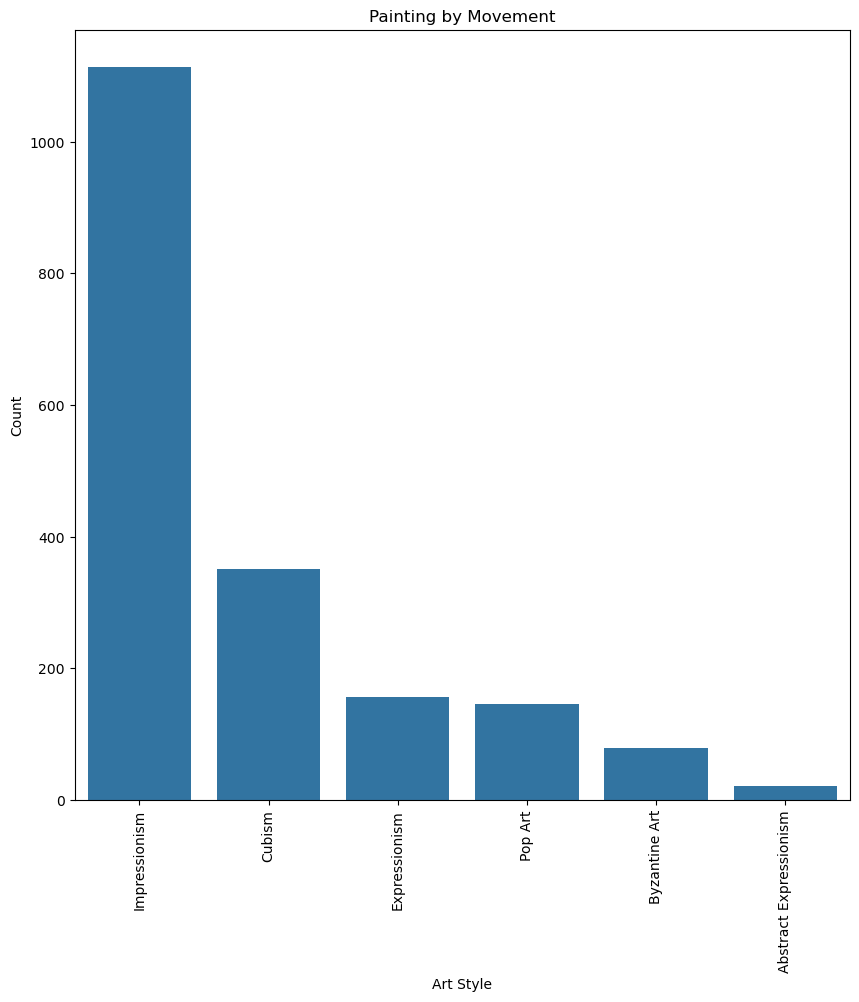

In [7]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_df.label.value_counts().keys(), y=train_df.label.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement')

plt.show()

#### AUGMENT A SAMPLE OF THE DATA AND SAVE TO TRAINING FOLDER

In [8]:
#create generator for image augmentation
data_gen = ImageDataGenerator(rotation_range=40, 
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              brightness_range=(0.25, 1.0),
                              channel_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2, 
                              horizontal_flip=True,
                              samplewise_std_normalization = True,
                              fill_mode='nearest')

C:\Users\sumitra.kamble\AppData\Roaming\Python\Python312\site-packages\keras\src\legacy\preprocessing\image.py:1072: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn(


In [9]:

# maximum = max(train_df.label.value_counts())

# for i in train_df.label.unique():
#     num = int(train_df.label[train_df.label == i].value_counts())
#     if num < maximum:
#         sample = list(train_df.filepath.loc[train_df.label == i].sample(frac=.75, replace=False))
#         for s in sample:
#             img = load_img(os.path.join(train, s))  
#             x = img_to_array(img)
#             x = x.reshape((1,) +x.shape)
#             count=0
            
#             for batch in data_gen.flow(x, batch_size=1, save_to_dir=os.path.join(train,i),
#                                       save_prefix=f'{i}_aug', save_format='jpeg'):
#                 count+=1
#                 if count>0:
#                     break

In [10]:
#augment data and add samples to smaller classes in training images only
#find max number of images for a genre 

maximum = max(train_df.label.value_counts())  # Get the max class size (1114)

for i in train_df.label.unique():
    num = int(train_df.label[train_df.label == i].value_counts())
    num_aug_images = maximum - num  # Number of images to generate

    if num < maximum:
        print(f"🔹 Augmenting '{i}' ({num} → {maximum}, Adding {num_aug_images} images)")

        # Sample only enough images to generate `num_aug_images`
        sample_size = min(len(train_df.filepath.loc[train_df.label == i]), num_aug_images)
        sample = list(train_df.filepath.loc[train_df.label == i].sample(n=sample_size, replace=True))

        count = 0  # Track the number of generated images
        for s in sample:
            img_path = os.path.join(train, s)

            try:
                img = load_img(img_path)  # ✅ Load image safely
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Generate only the required number of images
                for batch in data_gen.flow(x, batch_size=1, save_to_dir=os.path.join(train, i),
                                           save_prefix=f'{i}_aug', save_format='jpeg'):
                    count += 1
                    if count % 100 == 0 or count == 1:  # Print progress every 100 images
                        print(f"Generated {count}/{num_aug_images} images for '{i}'")

                    if count >= num_aug_images:  # ✅ Stop once enough images are created
                        print(f"✅ Finished augmenting '{i}' (Total: {num_aug_images})\n")
                        break  # **Break inner loop**
            except Exception as e:
                print(f"⚠️ Error processing {img_path}: {e}")

            if count >= num_aug_images:  # ✅ Stop augmentation for this class
                break  # **Break outer loop**



C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())


🔹 Augmenting 'Abstract Expressionism' (22 → 1114, Adding 1092 images)
Generated 1/1092 images for 'Abstract Expressionism'
Generated 100/1092 images for 'Abstract Expressionism'
Generated 200/1092 images for 'Abstract Expressionism'
Generated 300/1092 images for 'Abstract Expressionism'
Generated 400/1092 images for 'Abstract Expressionism'
Generated 500/1092 images for 'Abstract Expressionism'
Generated 600/1092 images for 'Abstract Expressionism'
Generated 700/1092 images for 'Abstract Expressionism'
Generated 800/1092 images for 'Abstract Expressionism'
Generated 900/1092 images for 'Abstract Expressionism'
Generated 1000/1092 images for 'Abstract Expressionism'
✅ Finished augmenting 'Abstract Expressionism' (Total: 1092)

🔹 Augmenting 'Byzantine Art' (79 → 1114, Adding 1035 images)


C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())


Generated 1/1035 images for 'Byzantine Art'
Generated 100/1035 images for 'Byzantine Art'
Generated 200/1035 images for 'Byzantine Art'
Generated 300/1035 images for 'Byzantine Art'
Generated 400/1035 images for 'Byzantine Art'
Generated 500/1035 images for 'Byzantine Art'
Generated 600/1035 images for 'Byzantine Art'
Generated 700/1035 images for 'Byzantine Art'
Generated 800/1035 images for 'Byzantine Art'
Generated 900/1035 images for 'Byzantine Art'
Generated 1000/1035 images for 'Byzantine Art'
✅ Finished augmenting 'Byzantine Art' (Total: 1035)

🔹 Augmenting 'Cubism' (351 → 1114, Adding 763 images)


C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())


Generated 1/763 images for 'Cubism'
Generated 100/763 images for 'Cubism'
Generated 200/763 images for 'Cubism'
Generated 300/763 images for 'Cubism'
Generated 400/763 images for 'Cubism'
Generated 500/763 images for 'Cubism'
Generated 600/763 images for 'Cubism'
Generated 700/763 images for 'Cubism'
✅ Finished augmenting 'Cubism' (Total: 763)

🔹 Augmenting 'Expressionism' (156 → 1114, Adding 958 images)


C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())


Generated 1/958 images for 'Expressionism'
Generated 100/958 images for 'Expressionism'
Generated 200/958 images for 'Expressionism'
Generated 300/958 images for 'Expressionism'
Generated 400/958 images for 'Expressionism'
Generated 500/958 images for 'Expressionism'
Generated 600/958 images for 'Expressionism'
Generated 700/958 images for 'Expressionism'
Generated 800/958 images for 'Expressionism'
Generated 900/958 images for 'Expressionism'
✅ Finished augmenting 'Expressionism' (Total: 958)

🔹 Augmenting 'Pop Art' (146 → 1114, Adding 968 images)
Generated 1/968 images for 'Pop Art'


C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())
C:\Users\sumitra.kamble\AppData\Local\Temp\ipykernel_35908\251603019.py:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  num = int(train_df.label[train_df.label == i].value_counts())


Generated 100/968 images for 'Pop Art'
Generated 200/968 images for 'Pop Art'
Generated 300/968 images for 'Pop Art'
Generated 400/968 images for 'Pop Art'
Generated 500/968 images for 'Pop Art'
Generated 600/968 images for 'Pop Art'
Generated 700/968 images for 'Pop Art'
Generated 800/968 images for 'Pop Art'
Generated 900/968 images for 'Pop Art'
✅ Finished augmenting 'Pop Art' (Total: 968)



In [11]:
#get image information from train.csv
train_aug_df = get_image_info(train)
#save training samples to train.csv
train_aug_df.to_csv(r'..\data\train_augmented.csv')

#### OBSERVE NEW DISTRIBUTION OF TRAINING DATA

In [13]:
train_aug_df.label.value_counts()

label
Impressionism             1114
Cubism                    1087
Pop Art                   1069
Byzantine Art             1068
Expressionism             1067
Abstract Expressionism    1049
Name: count, dtype: int64

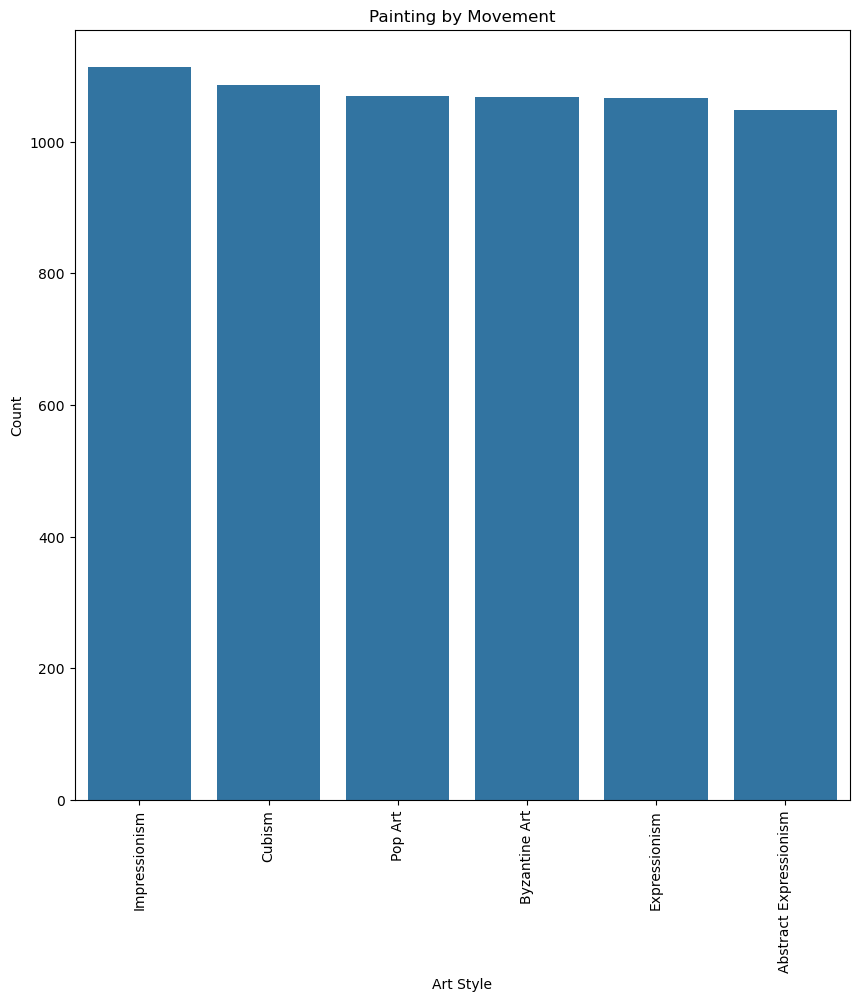

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=train_aug_df.label.value_counts().keys(), y=train_aug_df.label.value_counts())
plt.xticks(rotation='vertical')
plt.xlabel('Art Style')
plt.ylabel('Count')
plt.title('Painting by Movement')

plt.show()

In [15]:
import os

def count_images(directory):
    total_images = sum([len(files) for _, _, files in os.walk(directory)])
    return total_images

train_path = '../train_images'
val_path = '../val_images'
test_path = '../test_images'

print(f"Total train images: {count_images(train_path)}")
print(f"Total validation images: {count_images(val_path)}")
print(f"Total test images: {count_images(test_path)}")


Total train images: 6454
Total validation images: 207
Total test images: 231
